In [6]:
# Version de Python 3.11.8

# V1 Modelo pa estimación de fallo en bombas
Tarea de machine Learning. UCM 2023-204
Computo los NaN

In [7]:
from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [8]:
df1=pd.read_csv('./training set values.csv', sep=',')
# df_Y=pd.read_csv('./training set labels.csv', sep=',')
# df_all_1 = pd.merge(df1, df_Y, on='id', how='inner')

df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [9]:
#Paso a numerica date_recorded:
df2 = df1
df2['date_recorded'] = pd.to_datetime(df2['date_recorded'], format='%Y-%m-%d')

In [10]:
# Lista de variables numéricas
lista_de_numericas = [
    'amount_tsh',
    'date_recorded',
    'gps_height',
    'longitude',
    'latitude',
    'num_private',
    'region_code',
    'district_code',
    'population',
    'construction_year'
]

# Lista de variables categóricas
lista_de_categoricas = [
    'funder',
    'installer',
    'wpt_name',
    'basin',
    'subvillage',
    'region',
    'lga',
    'ward',
    'public_meeting',
    'recorded_by',
    'scheme_management',
    'scheme_name',
    'permit',
    'extraction_type',
    'extraction_type_group',
    'extraction_type_class',
    'management',
    'management_group',
    'payment',
    'payment_type',
    'water_quality',
    'quality_group',
    'quantity',
    'quantity_group',
    'source',
    'source_type',
    'source_class',
    'waterpoint_type',
    'waterpoint_type_group',
    'status_group'
]

In [11]:
# tarda 4-5'
# Analizamos las numéricas, excepto la de tipo datatime
if 0:
    for ln in lista_de_numericas:
        if (ln != 'date_recorded'):
            print("------", ln.upper(), "------")
            print(df1[ln].describe())
            resultados_outliers = gestiona_outliers(df1[ln])
            print("Atípicos inferiores:", resultados_outliers[0])
            print("Atípicos superiores:", resultados_outliers[1])
            print("% valores atípicos:", resultados_outliers[2])
            print("missings: ", (df1[ln].isnull().sum()))
            print("ceros: ", (df1[ln] == 0).sum())
            
            histogram_boxplot(df1[ln], xlabel = None, title = ln, font_scale=1, figsize=(6,3), bins = None)



Trataremos las columnas numéricas de esta manera:

'id',			        ok

'amount_tsh',	    	ok	

'gps_height',	    	quitar -90 y 0	ceros: 20438 

'longitude',		quitar 0	ceros: 1812 

'latitude',		    debe haber -1	PENDIENTE

'num_private',		Si != 0 es 1	

'region_code',	    Ver que hacer más adelante

'district_code_mod',eliminar, no aporta

'population',		Estudiar la distribución. winsorizar outlayers?

'construction_year'	quitar 0. ceros: 20709 	

'date_recorded',	ok		


In [12]:
df2 = df1



In [13]:
df2.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [14]:
# convierto lista_de_numericas_modificadas = ["gps_height", "longitude", "construction_year"]
# a str para visualizar las missings
lista_de_numericas_modificadas = ["gps_height", "longitude", "construction_year"]
for ln in lista_de_numericas_modificadas:
    # Convertir la columna numérica a tipo string (str)
    df2[ln] = df2[ln].astype(str)    

df2['gps_height'] = df2['gps_height'].replace("-90", '')
df2['gps_height'] = df2['gps_height'].replace("0", '')
df2['gps_height'] = df2['gps_height'].replace("", None)
df2['longitude'] = df2['longitude'].replace("0", '')
df2['longitude'] = df2['longitude'].replace("", None)
df2['construction_year'] = df2['construction_year'].replace("0", '')
df2['construction_year'] = df2['construction_year'].replace("", None)

pd.set_option('display.max_columns', None)


In [15]:
resumen = missing_values_summary(df2)
print(resumen)



                       Valores Nulos  % de Valores Nulos
id                                 0                 0.0
amount_tsh                         0                 0.0
date_recorded                      0                 0.0
funder                          3637                 6.1
gps_height                     20439                34.4
installer                       3655                 6.2
longitude                          0                 0.0
latitude                           0                 0.0
wpt_name                           2                 0.0
num_private                        0                 0.0
basin                              0                 0.0
subvillage                       371                 0.6
region                             0                 0.0
region_code                        0                 0.0
district_code                      0                 0.0
lga                                0                 0.0
ward                           

In [30]:
# Busco qué columnas contienen ceros
print(zero_searcher(df2))

['id', 'amount_tsh', 'funder', 'installer', 'num_private', 'district_code', 'population', 'public_meeting', 'permit']


In [ ]:
# valoro que columnas quiero igualar a NaN
from_0_to_NaN = ['funder', 'installer']
# Amount_tsh puede significar que no hay agua disponible en el pozo o algo similar. De momento no imputo a NaN
# En el resto de variables 0 no es missing


<Axes: >

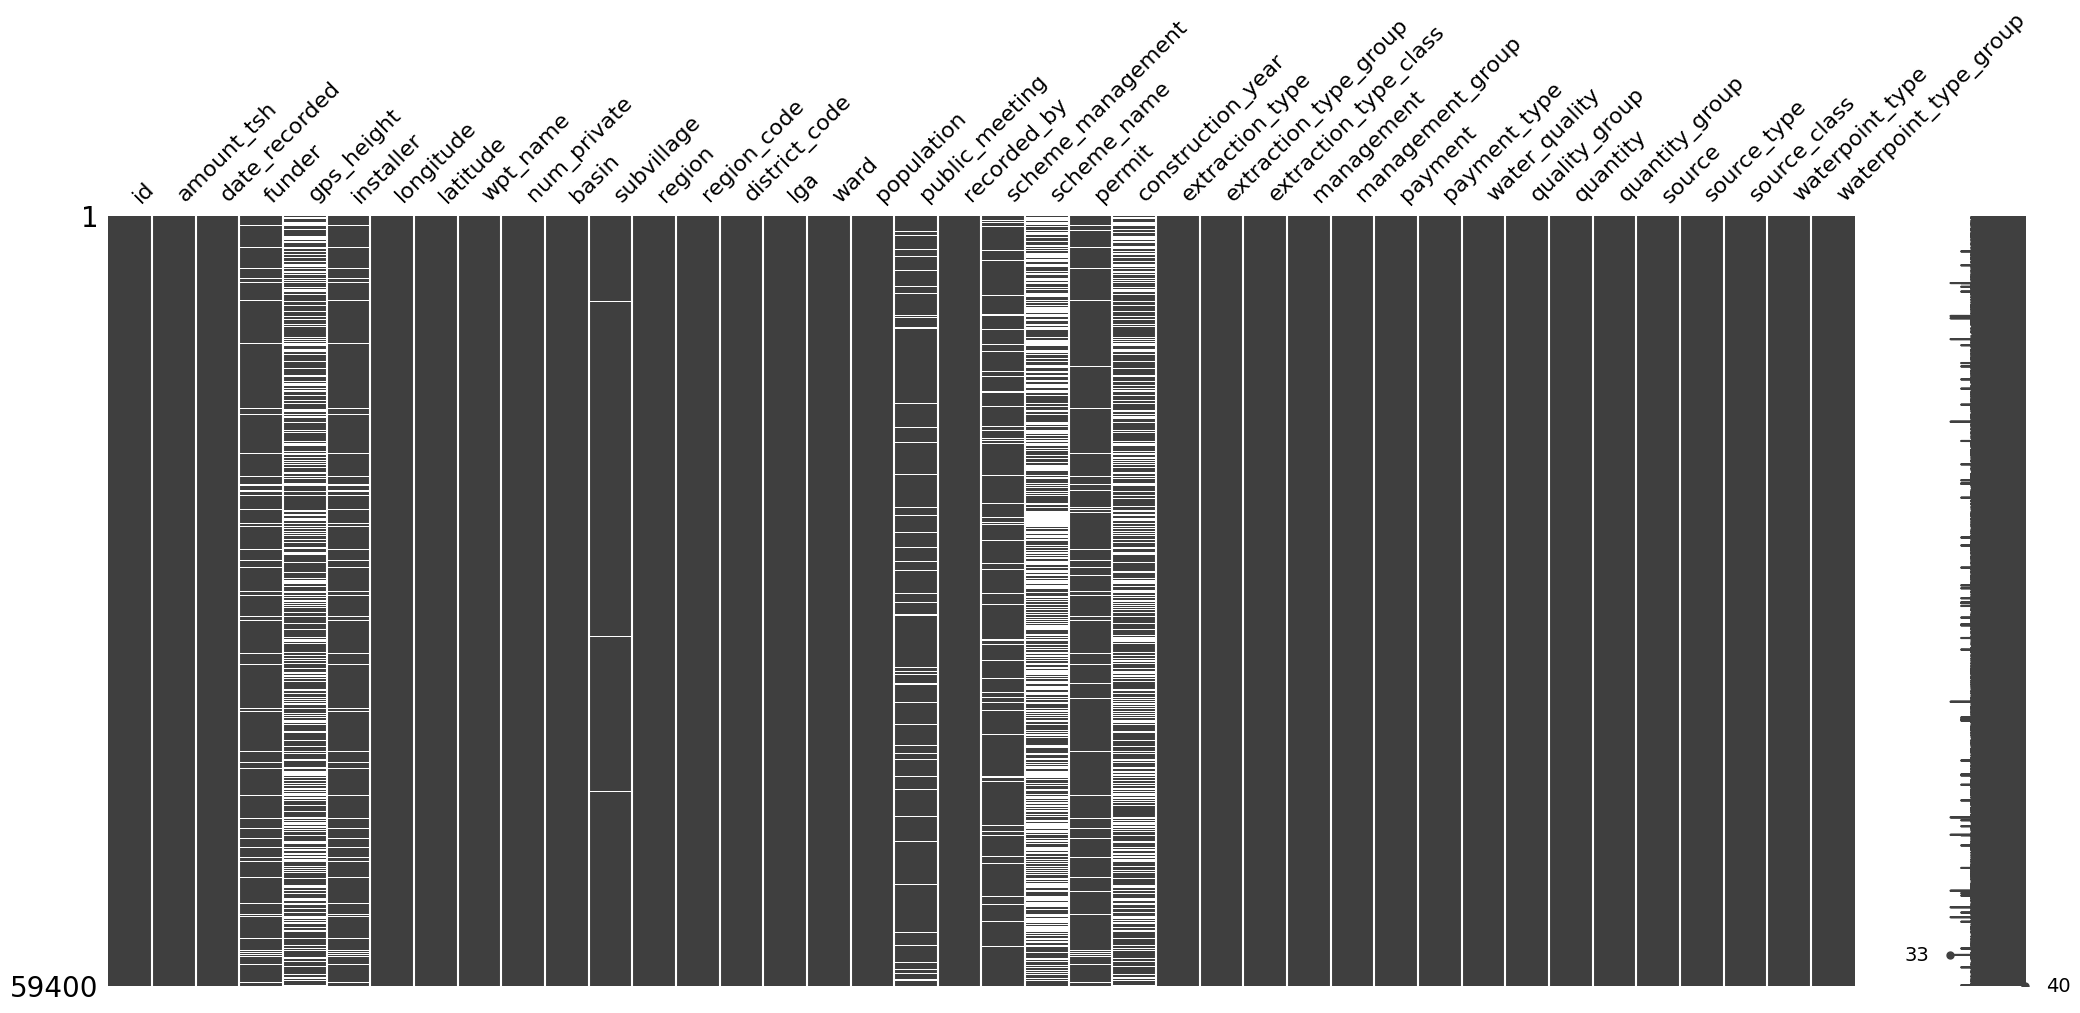

In [17]:
msno.matrix(df2.sort_values(by='id'))

Eliminaré gps_height y scheme_name.
Construction_year, me parece muy relevante de momento.

<Axes: >

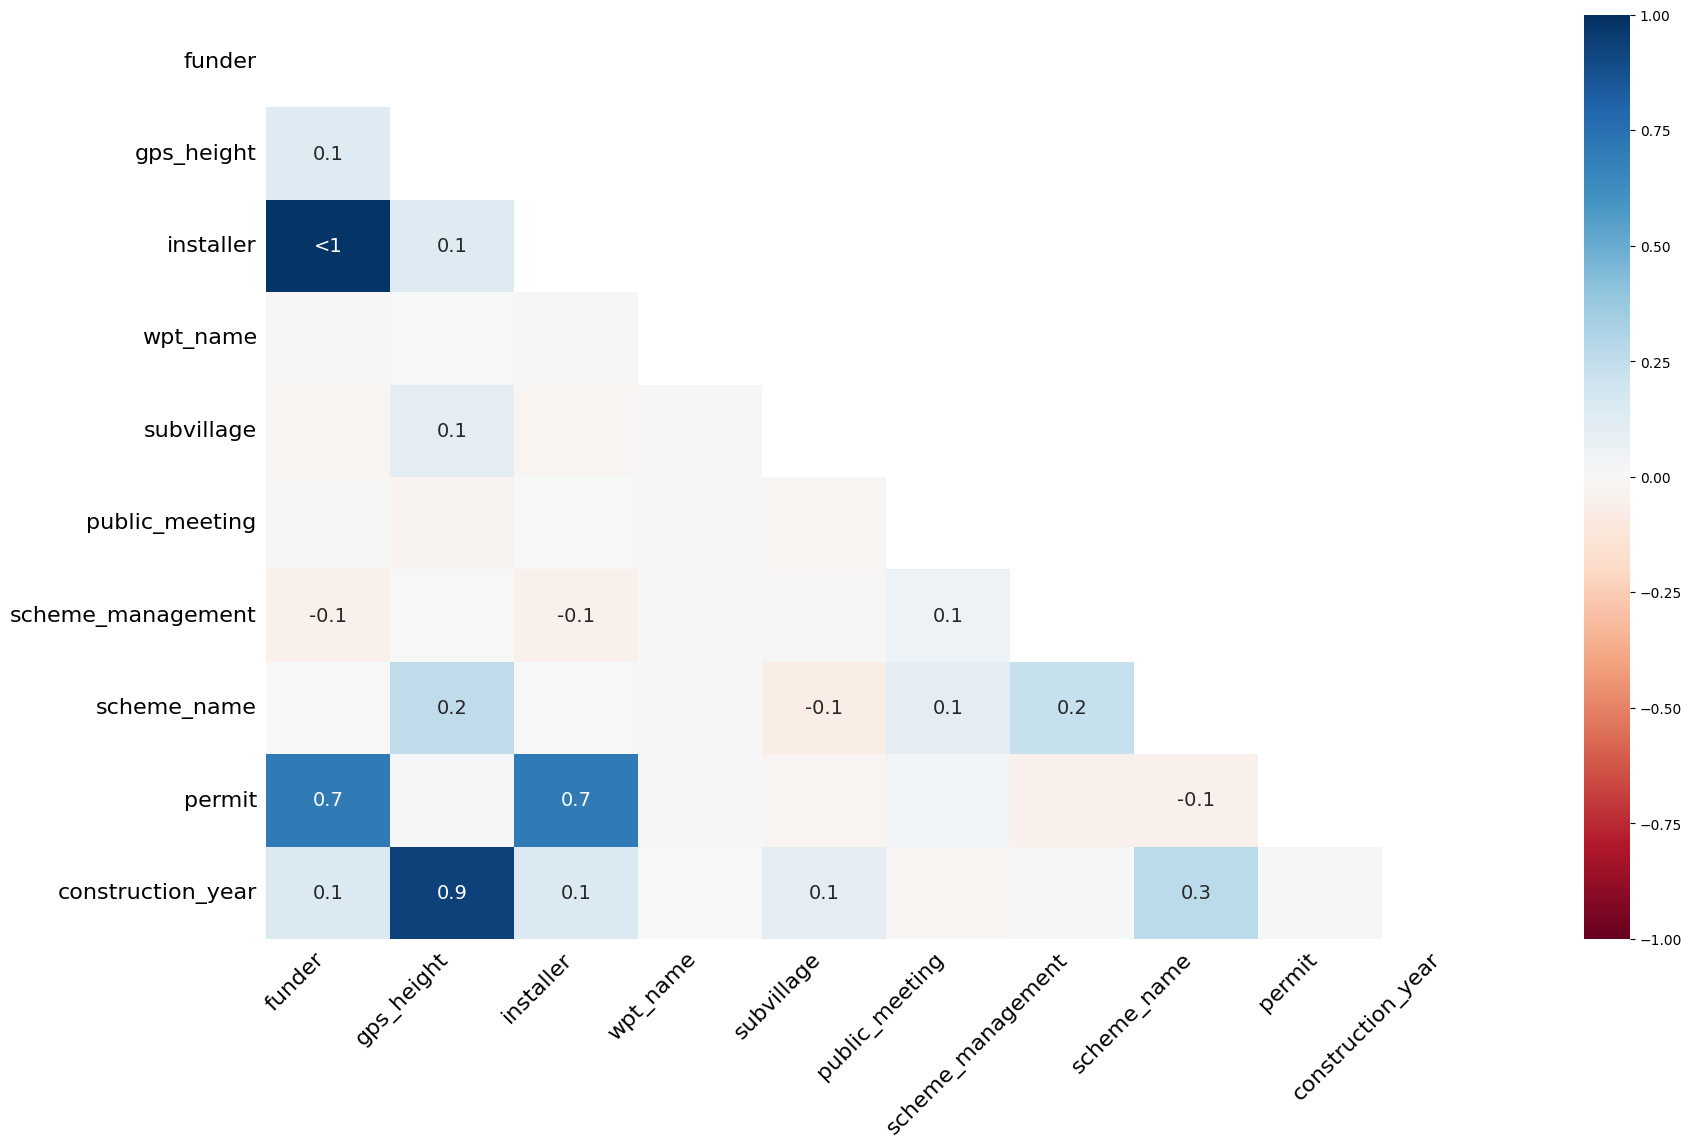

In [18]:
# Muestra correlación con missings de distintas variables
msno.heatmap(df2)

Analizamos las categóricas

In [19]:
#añadimos target. Creamos df3
df_target = pd.read_csv("./training set labels.csv")
df3 =pd.merge(df2, df_target, on='id', how='inner')

------ FUNDER ------
count                      55763
unique                      1896
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object
NaN:  3637
ceros:  777


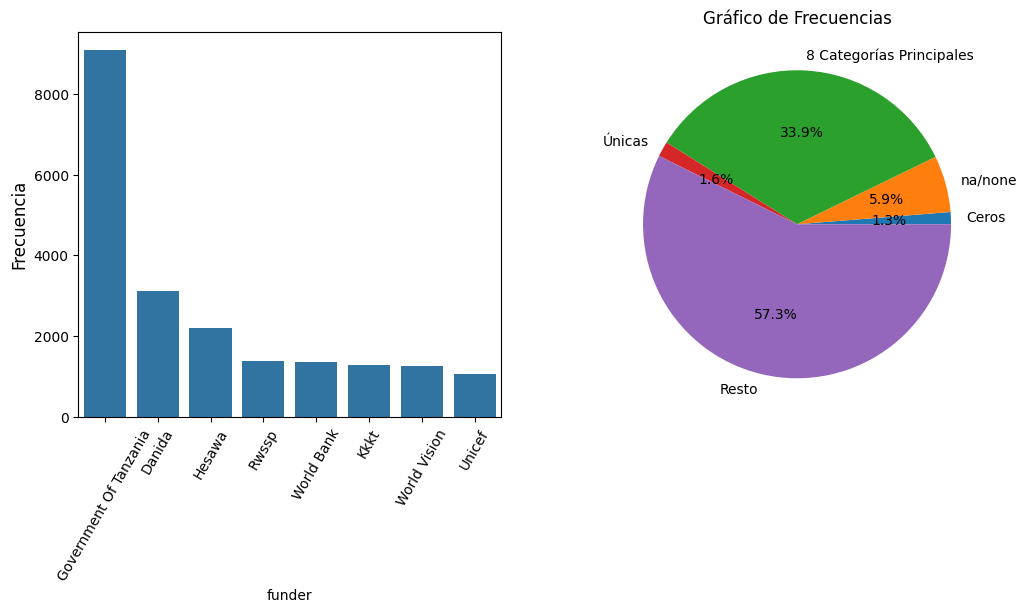

------ INSTALLER ------
count     55745
unique     2145
top         DWE
freq      17402
Name: installer, dtype: object
NaN:  3655
ceros:  777


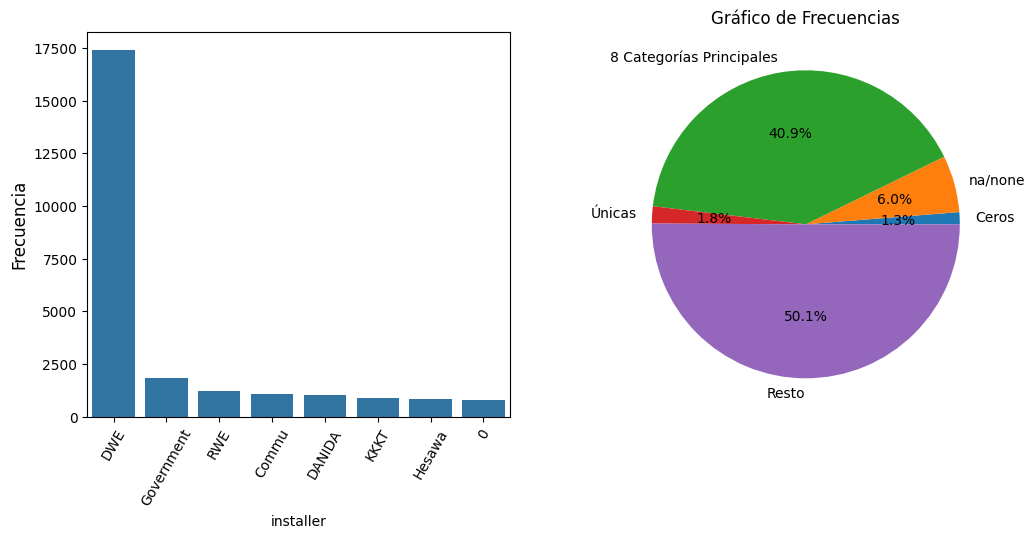

------ WPT_NAME ------
count     59398
unique    37399
top        none
freq       3563
Name: wpt_name, dtype: object
NaN:  3565
ceros:  0


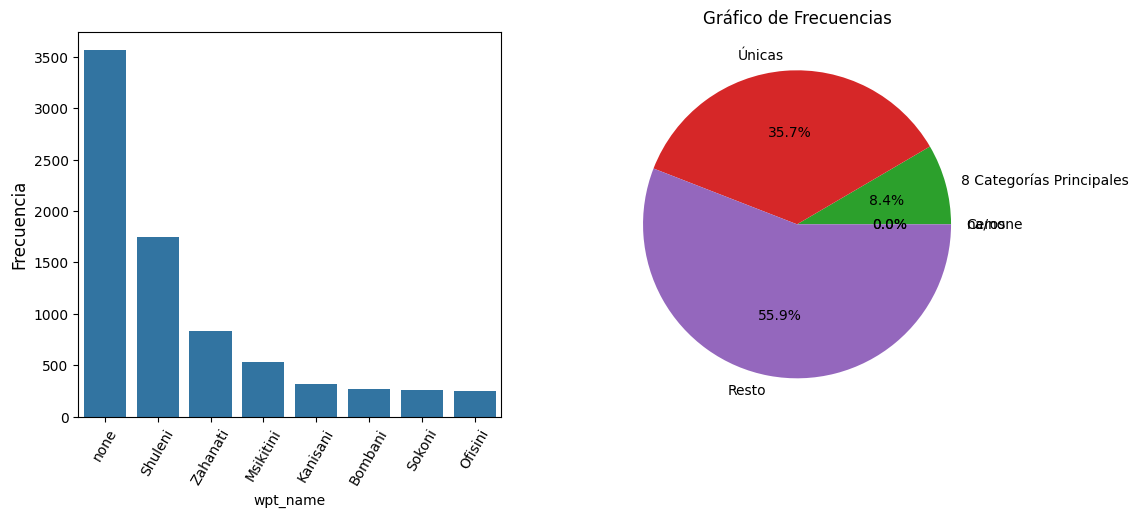

------ BASIN ------
count             59400
unique                9
top       Lake Victoria
freq              10248
Name: basin, dtype: object
NaN:  0
ceros:  0


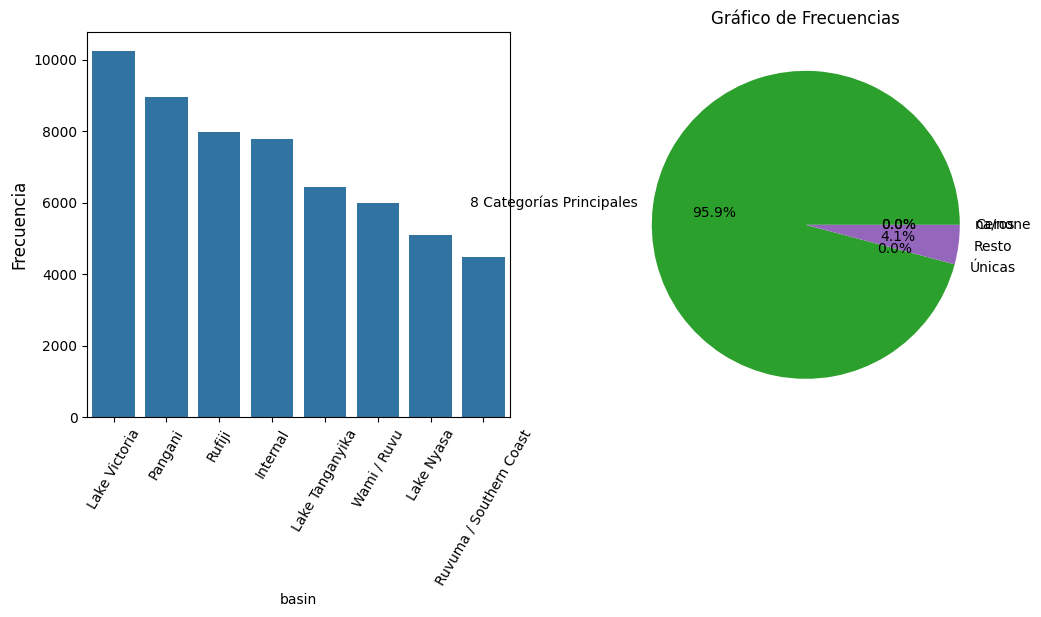

------ SUBVILLAGE ------
count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object
NaN:  371
ceros:  0


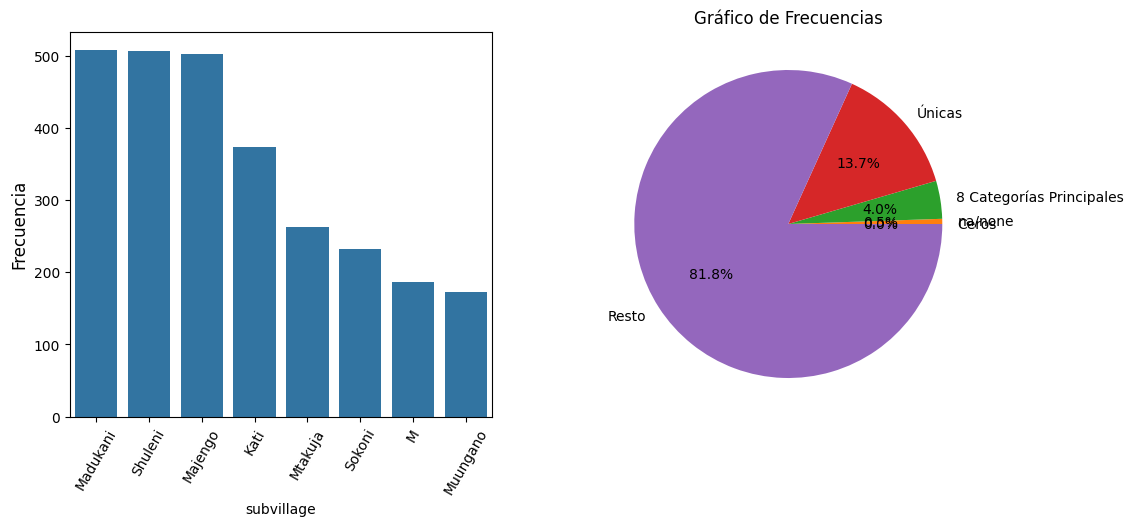

------ REGION ------
count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object
NaN:  0
ceros:  0


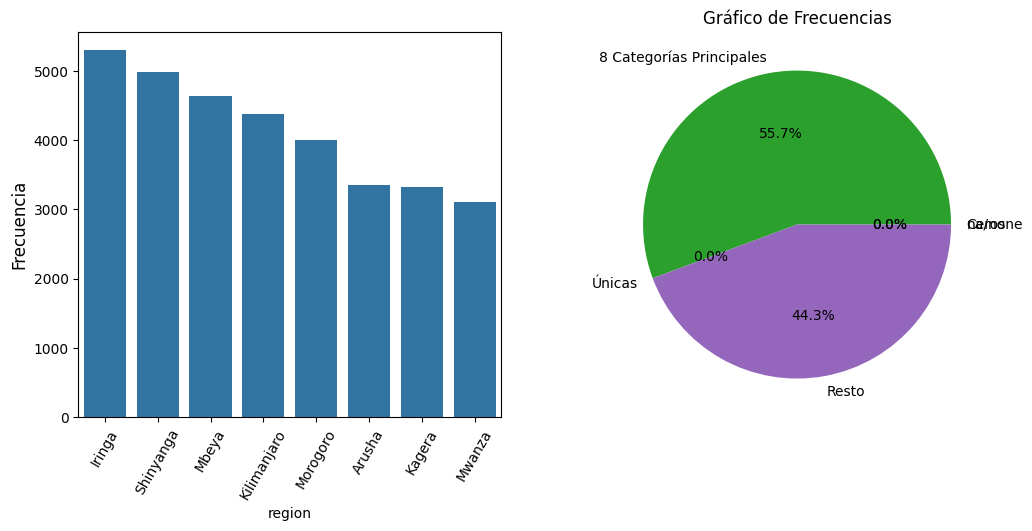

------ LGA ------
count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object
NaN:  0
ceros:  0


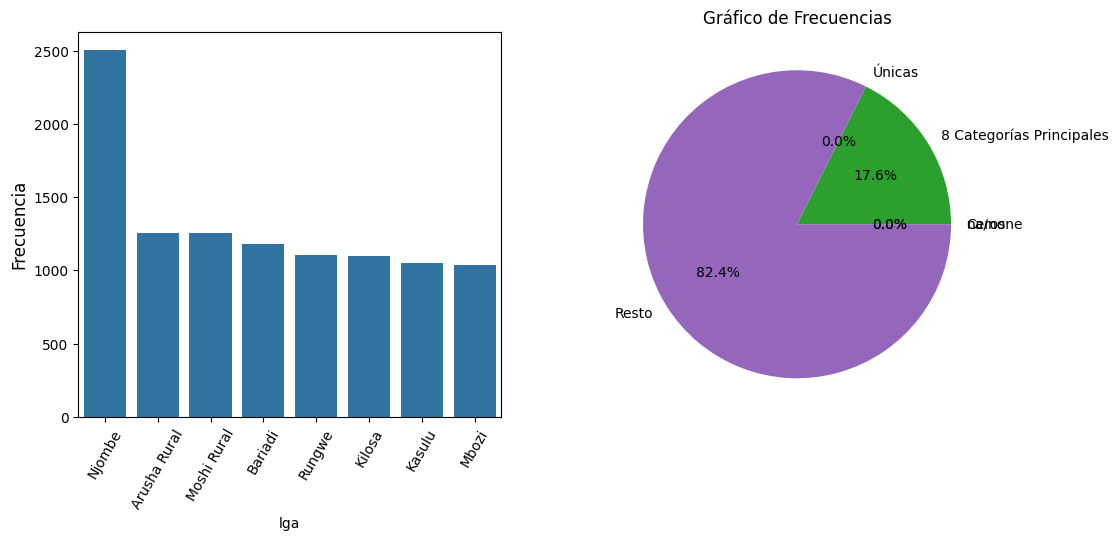

------ WARD ------
count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object
NaN:  0
ceros:  0


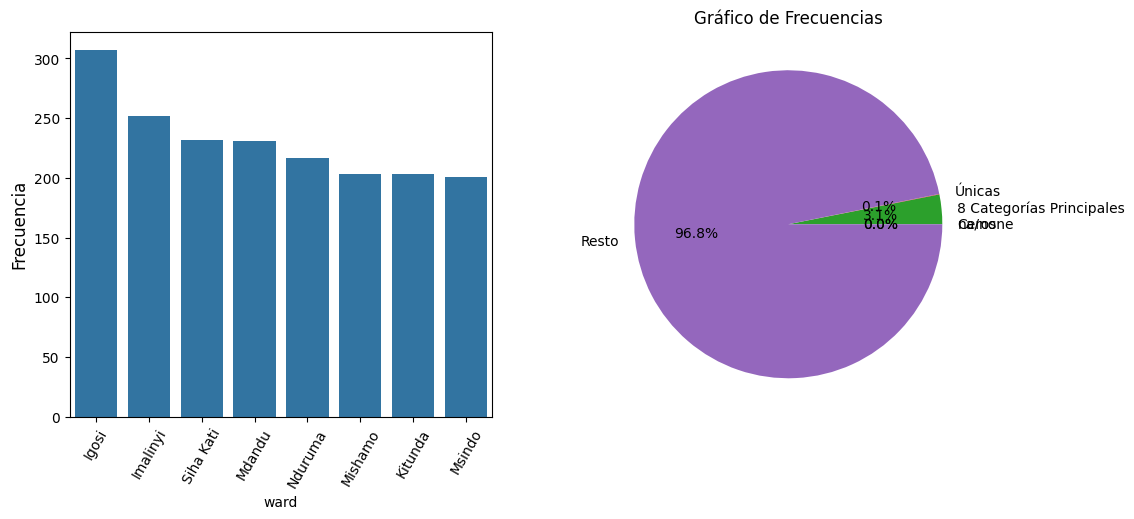

------ PUBLIC_MEETING ------
count     56066
unique        2
top        True
freq      51011
Name: public_meeting, dtype: object
NaN:  3334
ceros:  0


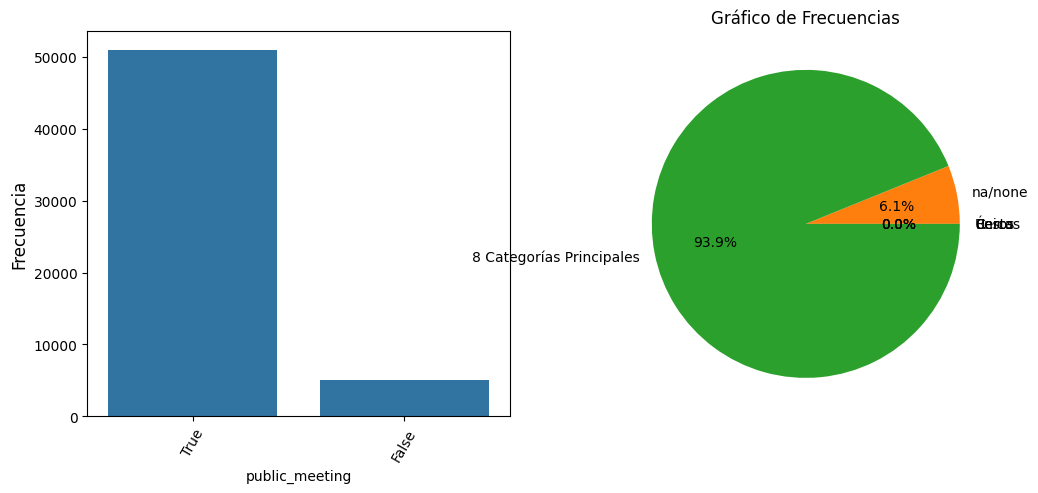

------ RECORDED_BY ------
count                       59400
unique                          1
top       GeoData Consultants Ltd
freq                        59400
Name: recorded_by, dtype: object
NaN:  0
ceros:  0


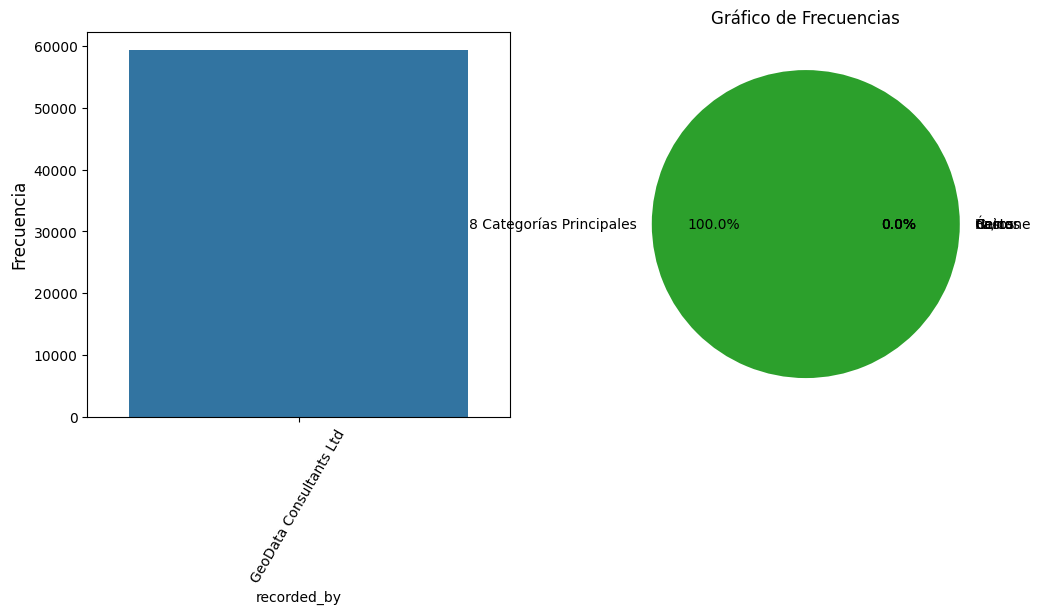

------ SCHEME_MANAGEMENT ------
count     55522
unique       11
top         VWC
freq      36793
Name: scheme_management, dtype: object
NaN:  3878
ceros:  0


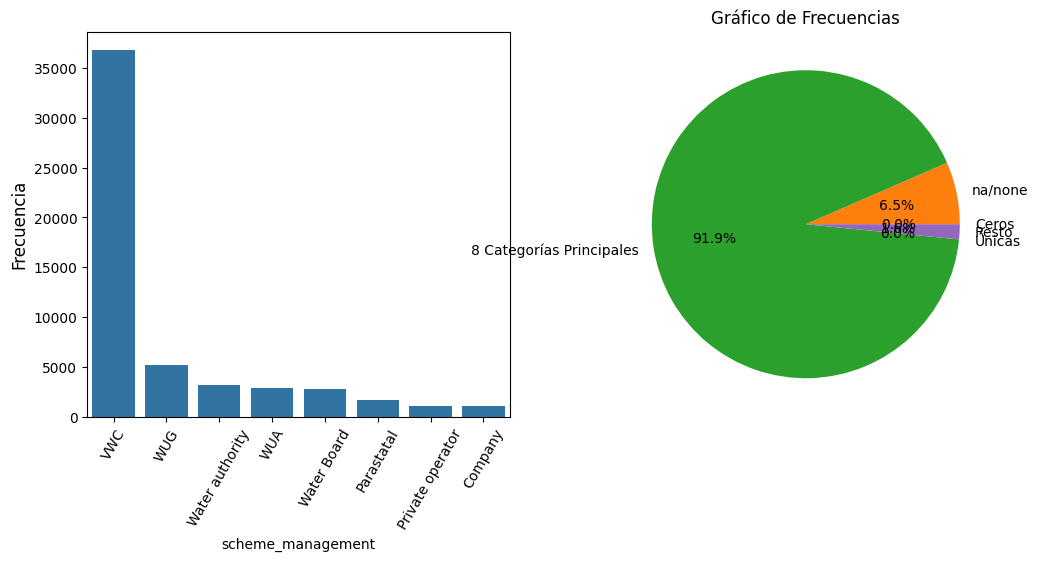

------ SCHEME_NAME ------
count     30590
unique     2695
top           K
freq        682
Name: scheme_name, dtype: object
NaN:  28835
ceros:  0


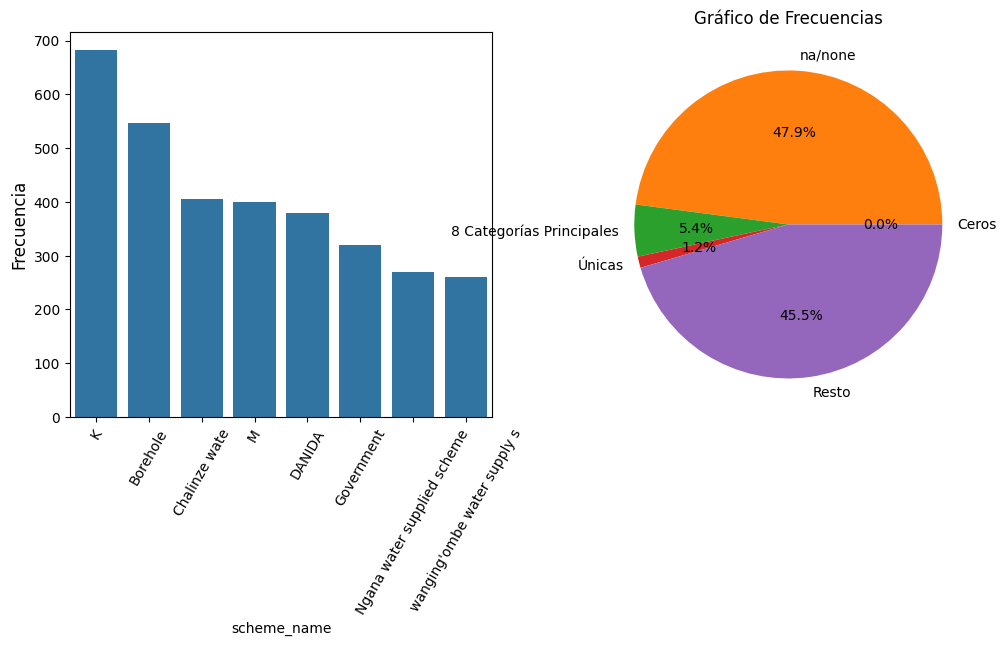

------ PERMIT ------
count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object
NaN:  3056
ceros:  0


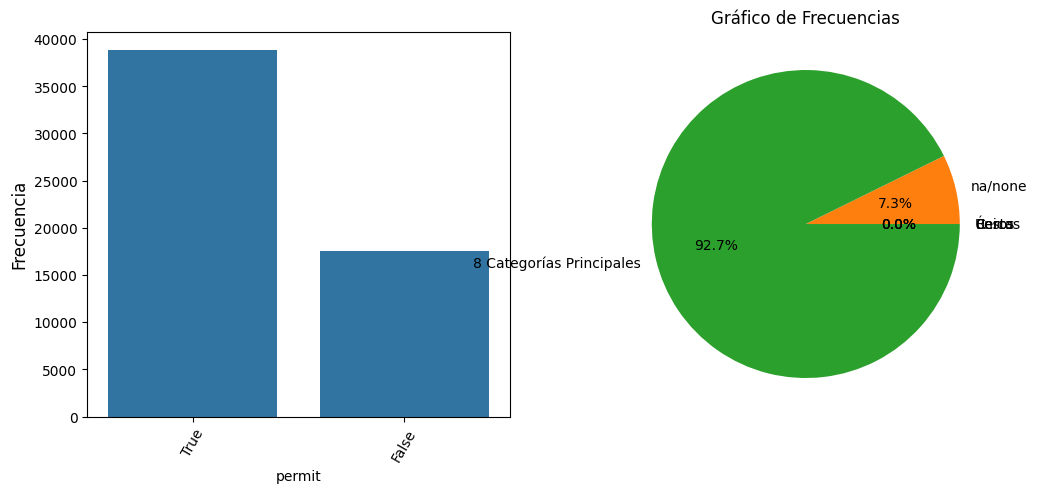

------ EXTRACTION_TYPE ------
count       59400
unique         18
top       gravity
freq        26780
Name: extraction_type, dtype: object
NaN:  0
ceros:  0


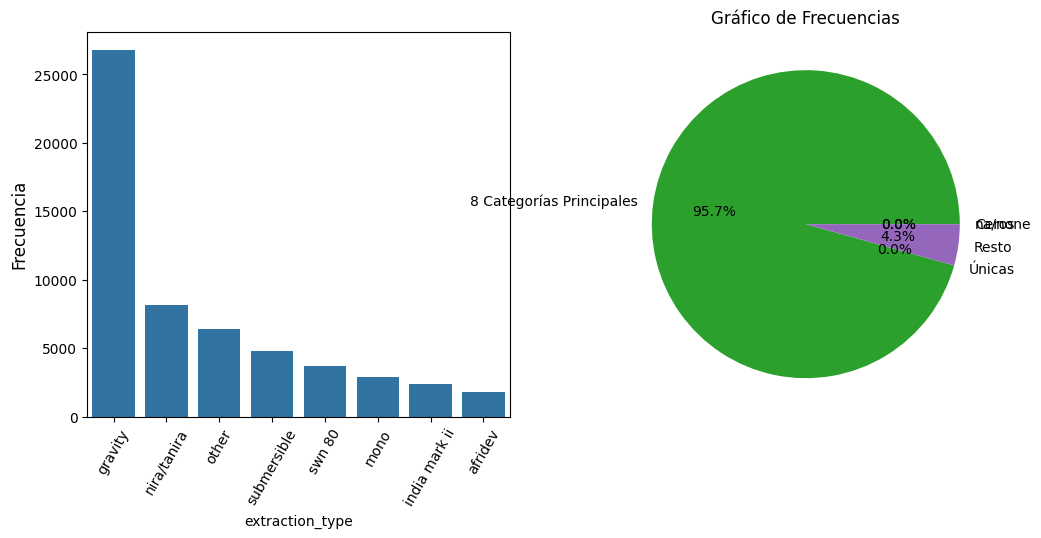

------ EXTRACTION_TYPE_GROUP ------
count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object
NaN:  0
ceros:  0


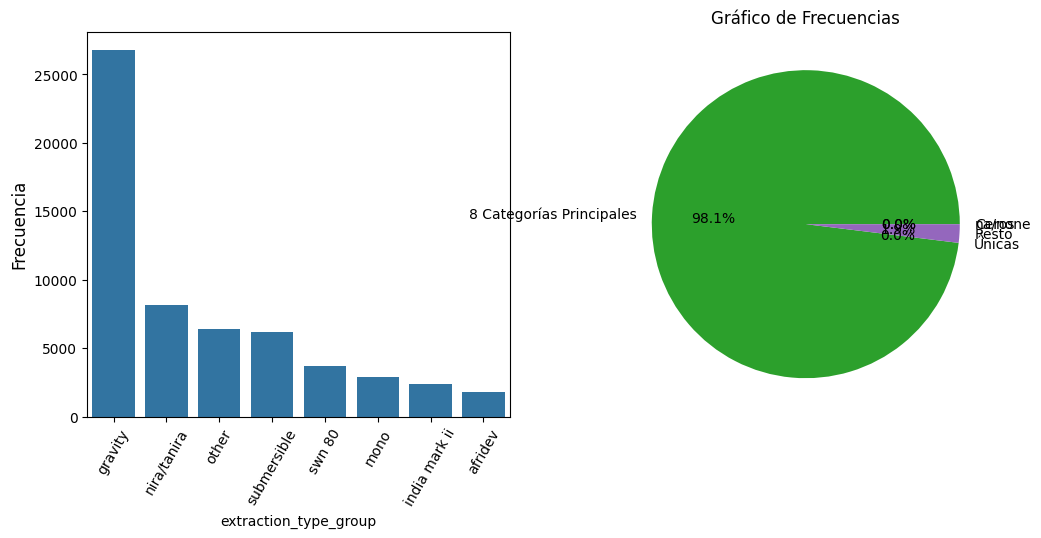

------ EXTRACTION_TYPE_CLASS ------
count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object
NaN:  0
ceros:  0


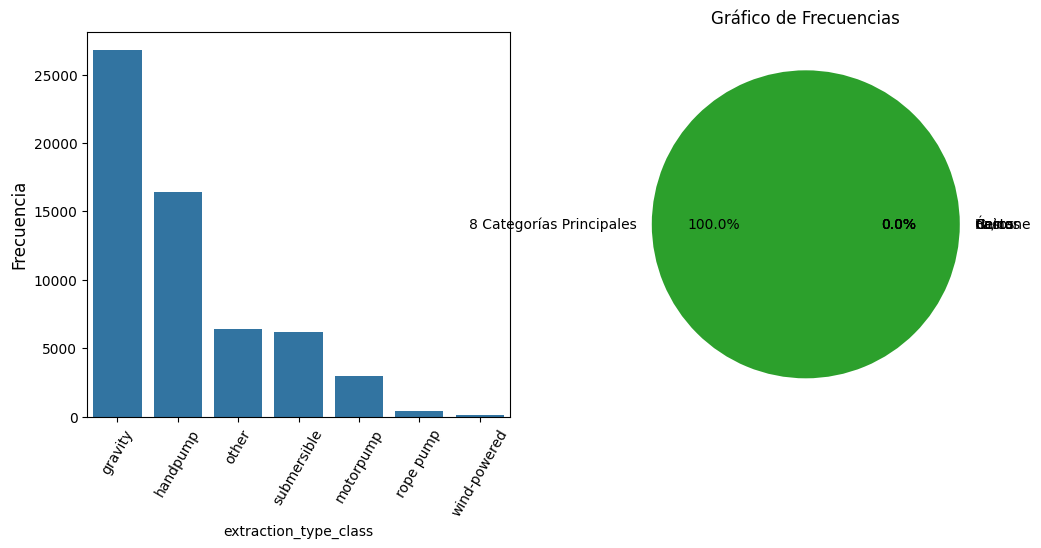

------ MANAGEMENT ------
count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object
NaN:  0
ceros:  0


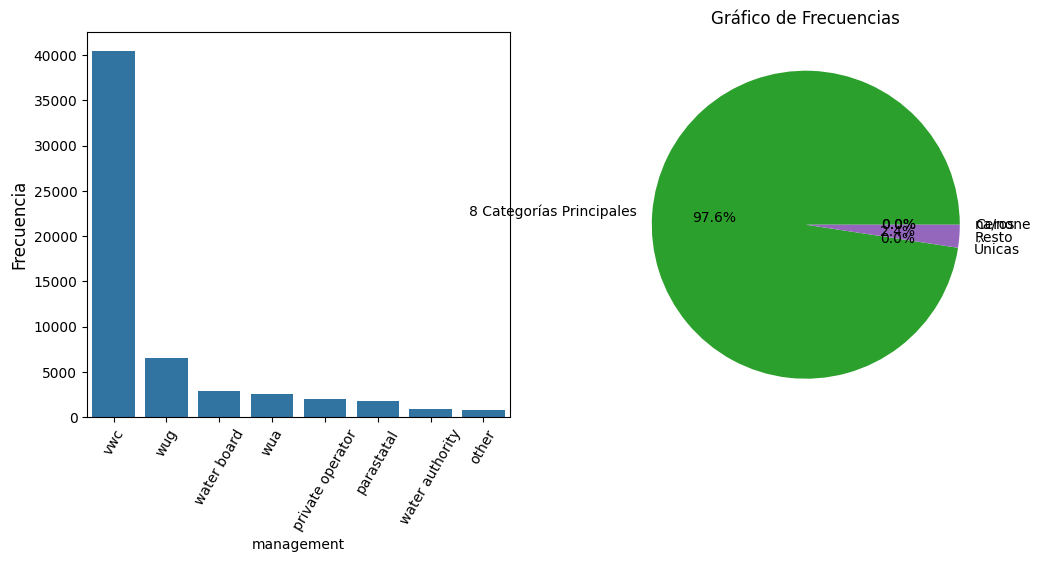

------ MANAGEMENT_GROUP ------
count          59400
unique             5
top       user-group
freq           52490
Name: management_group, dtype: object
NaN:  0
ceros:  0


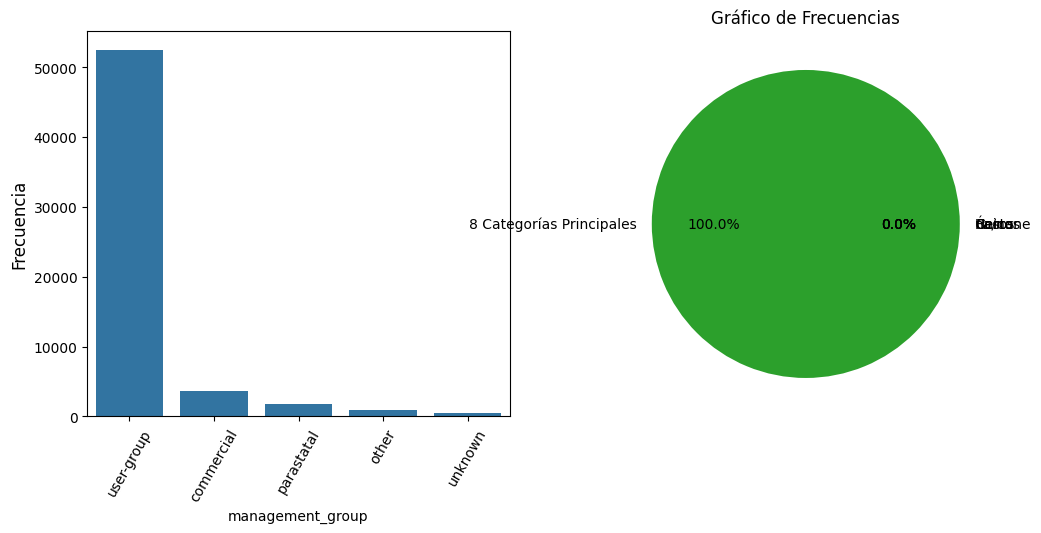

------ PAYMENT ------
count         59400
unique            7
top       never pay
freq          25348
Name: payment, dtype: object
NaN:  0
ceros:  0


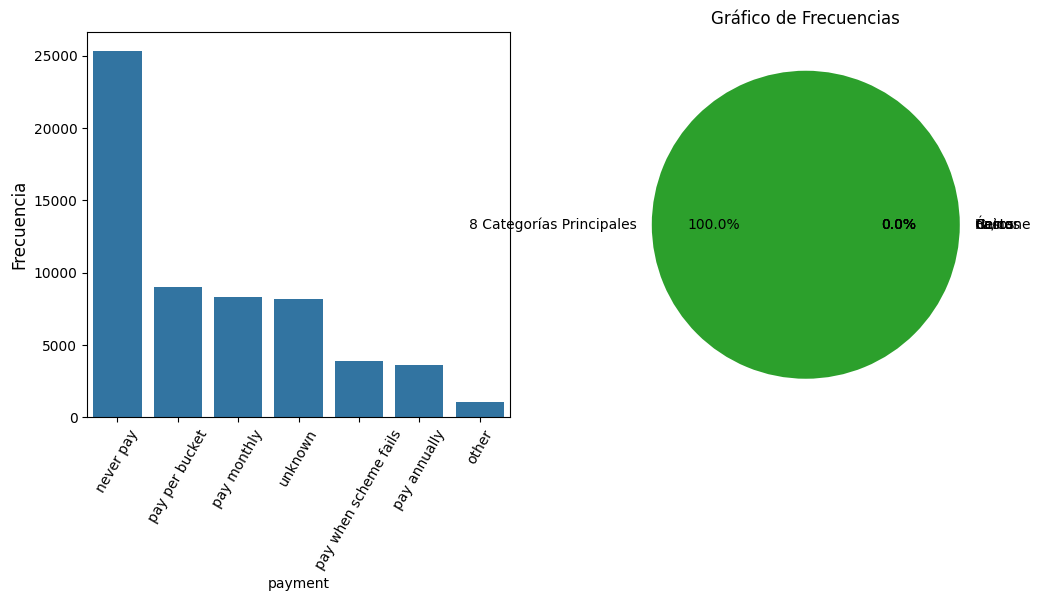

------ PAYMENT_TYPE ------
count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object
NaN:  0
ceros:  0


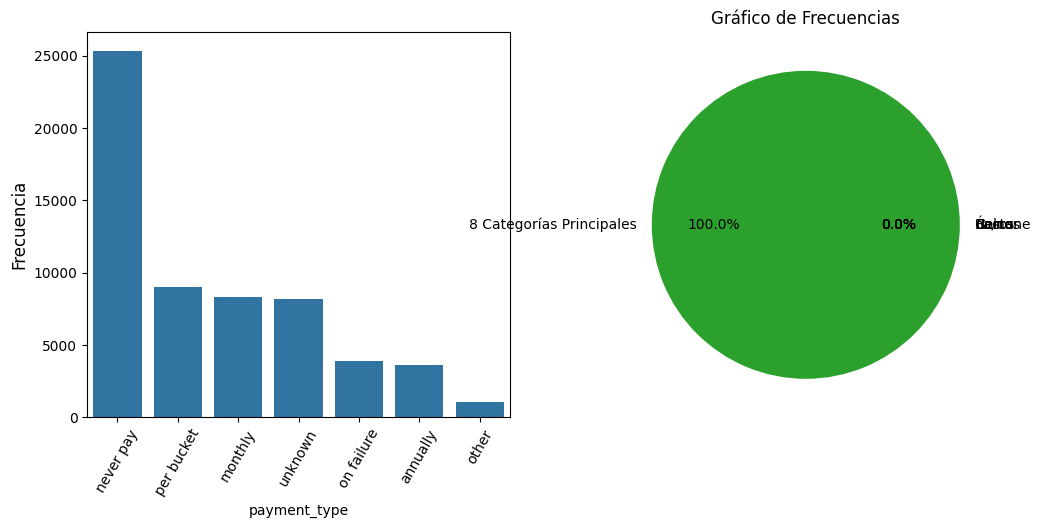

------ WATER_QUALITY ------
count     59400
unique        8
top        soft
freq      50818
Name: water_quality, dtype: object
NaN:  0
ceros:  0


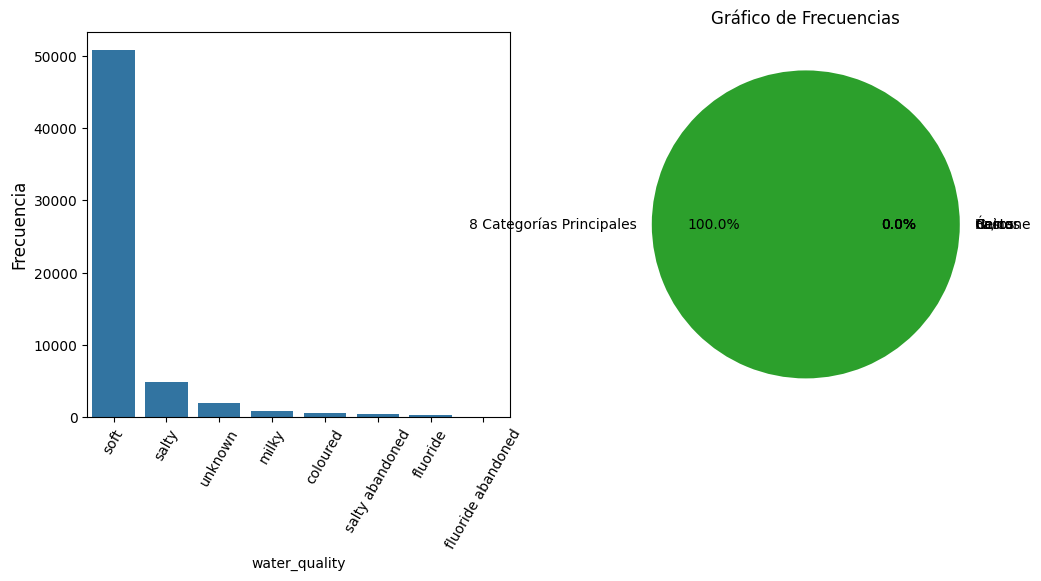

------ QUALITY_GROUP ------
count     59400
unique        6
top        good
freq      50818
Name: quality_group, dtype: object
NaN:  0
ceros:  0


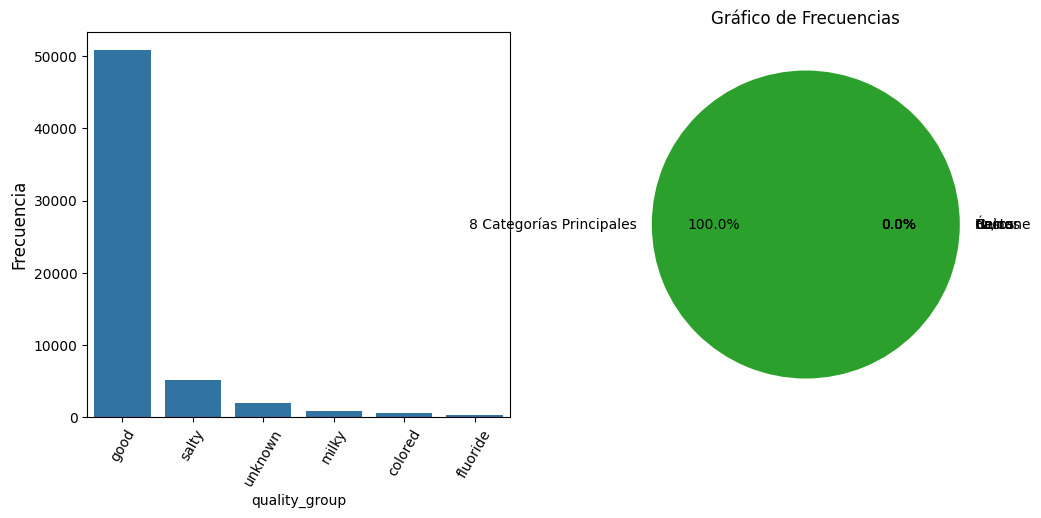

------ QUANTITY ------
count      59400
unique         5
top       enough
freq       33186
Name: quantity, dtype: object
NaN:  0
ceros:  0


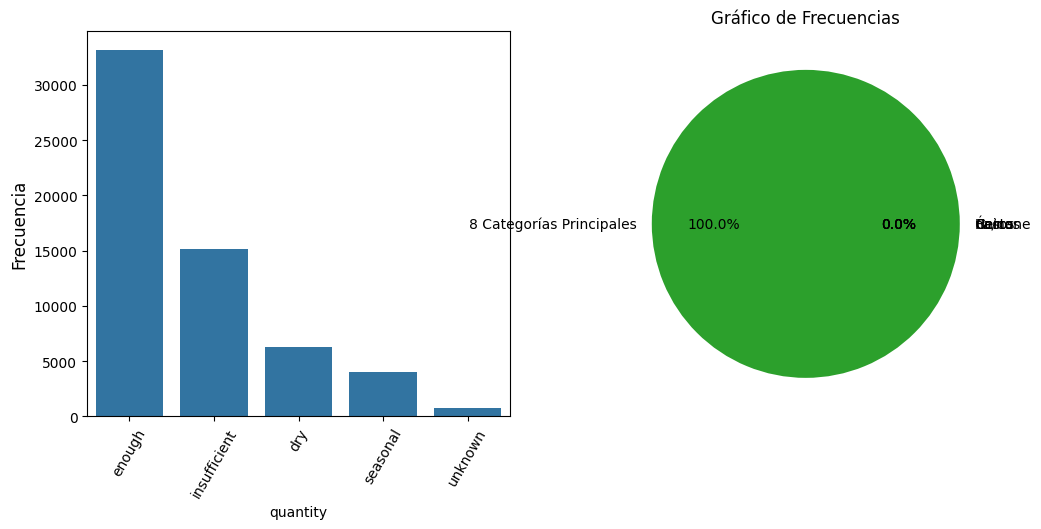

------ QUANTITY_GROUP ------
count      59400
unique         5
top       enough
freq       33186
Name: quantity_group, dtype: object
NaN:  0
ceros:  0


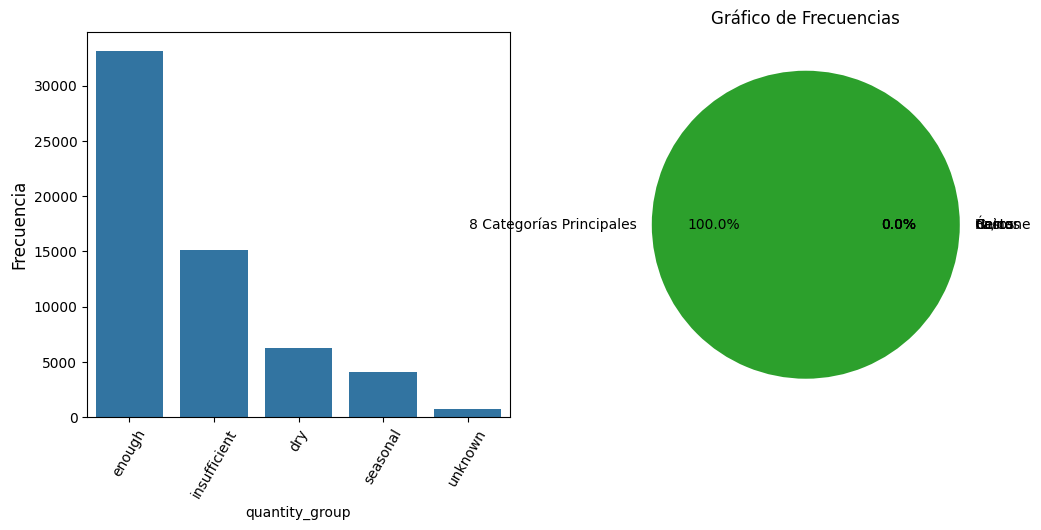

------ SOURCE ------
count      59400
unique        10
top       spring
freq       17021
Name: source, dtype: object
NaN:  0
ceros:  0


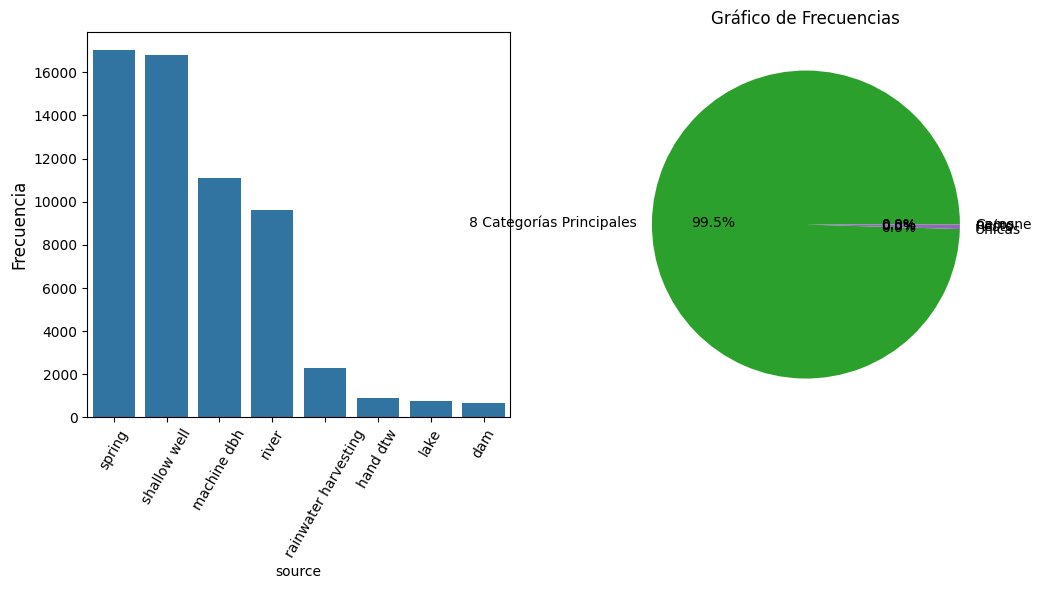

------ SOURCE_TYPE ------
count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object
NaN:  0
ceros:  0


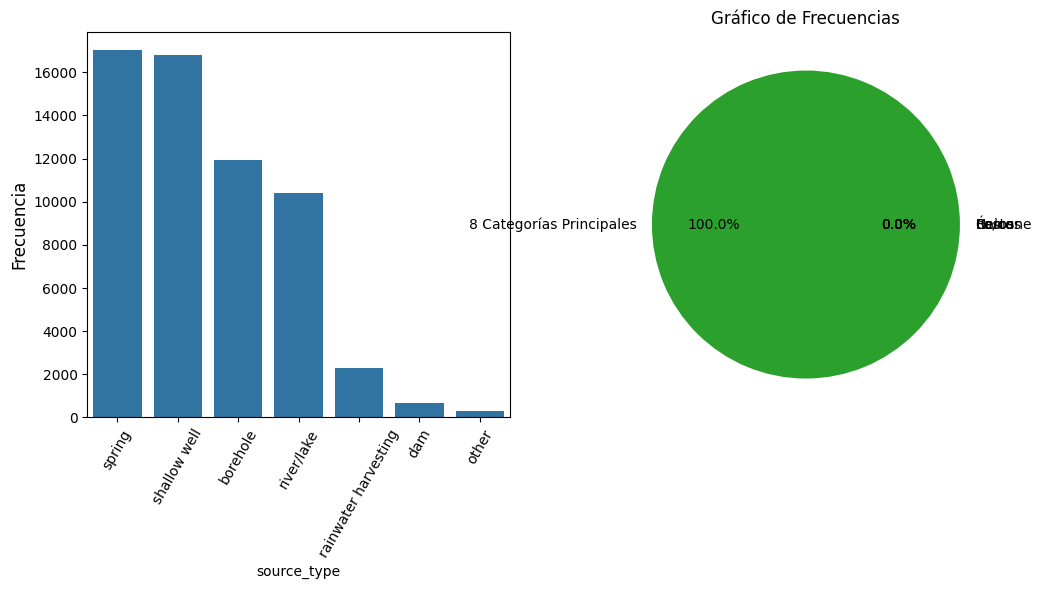

------ SOURCE_CLASS ------
count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object
NaN:  0
ceros:  0


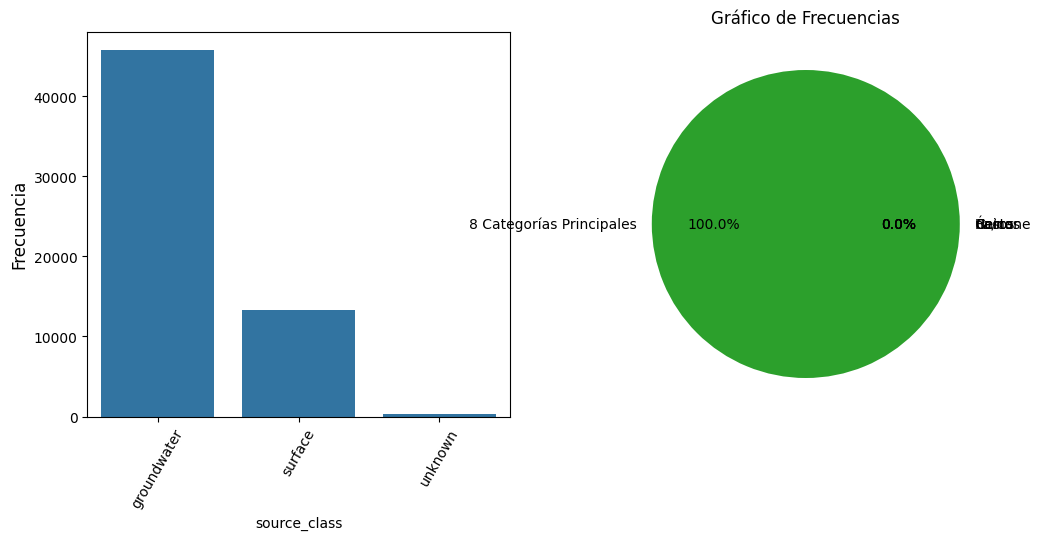

------ WATERPOINT_TYPE ------
count                  59400
unique                     7
top       communal standpipe
freq                   28522
Name: waterpoint_type, dtype: object
NaN:  0
ceros:  0


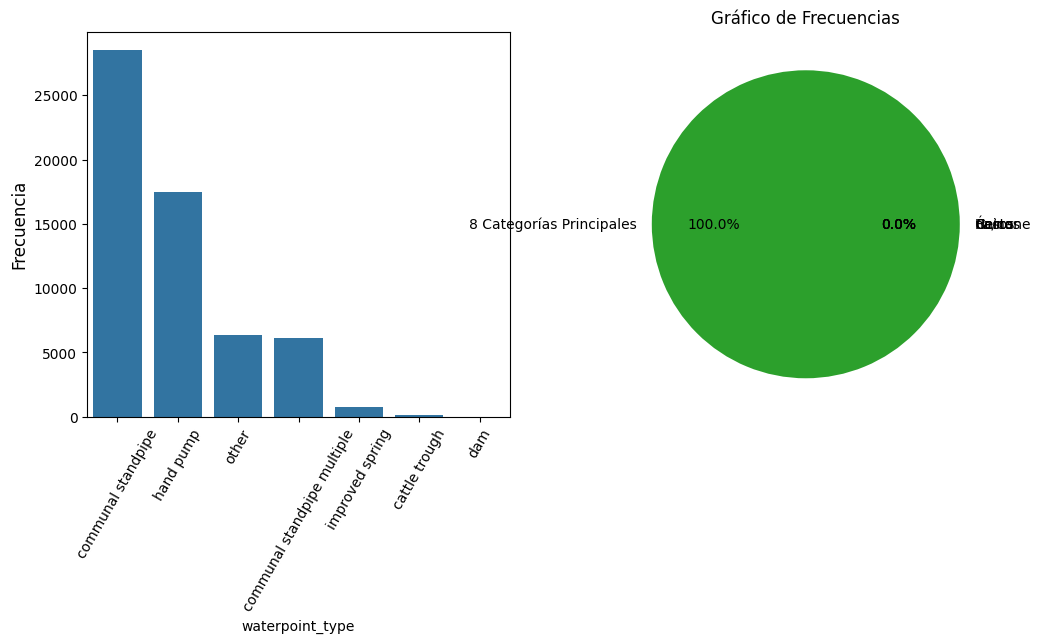

------ WATERPOINT_TYPE_GROUP ------
count                  59400
unique                     6
top       communal standpipe
freq                   34625
Name: waterpoint_type_group, dtype: object
NaN:  0
ceros:  0


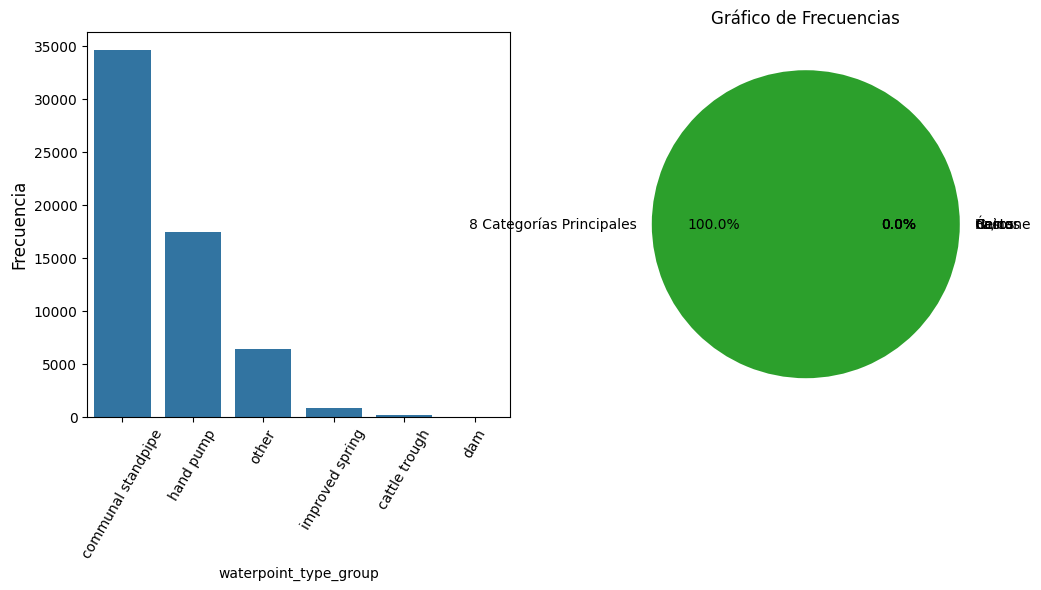

------ STATUS_GROUP ------
count          59400
unique             3
top       functional
freq           32259
Name: status_group, dtype: object
NaN:  0
ceros:  0


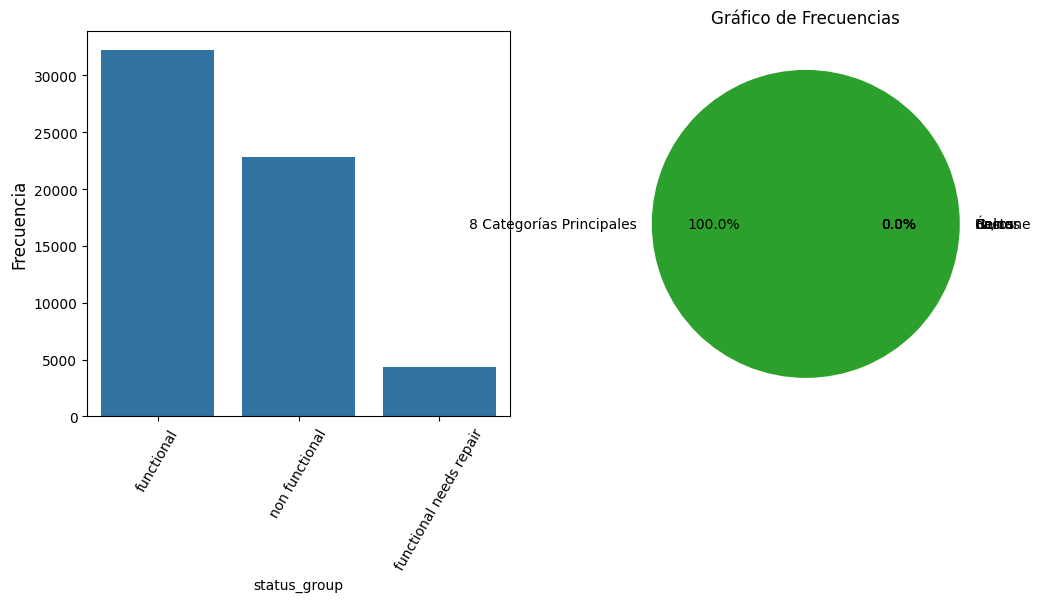

In [20]:
# Creo una funcion para analizarlas rapidamente

# Ejemplo de uso:


for lc in lista_de_categoricas:
    mostrar_categoricas(df3, lc)


In [21]:
"""  
Como gestionar NaN. Qué incluir y cómo:

    'installer',	    	0 son na
    'wpt_name',		        multivariante
    'basin',		        ok
    'subvillage',	       	multivariante
    'region',		        eliminar columna
    'lga',		            ok
    'ward',		            ok
    'public_meeting',   	imputar por multivariante
    'recorded_by',		    eliminar columna. Todos =
    'scheme_management',		
    'scheme_name',		
    'permit',		
    'extraction_type',		
    'extraction_type_group',		
    'extraction_type_class',		
    'management',		
    'management_group',		
    'payment',		
    'payment_type',		
    'water_quality',		
    'quality_group',		
    'quantity',		
    'quantity_group',		
    'source',		
    'source_type',		
    'source_class',		
    'waterpoint_type',		
    'waterpoint_type_group'		
lista en las que 0 son NaN:
lista_cat_0_son_NaN = [ 'funder','installer', ]
"""

"\xa0 \nComo gestionar NaN. Qué incluir y cómo:\n\n    'installer',\t    \t0 son na\n\xa0 \xa0 'wpt_name',\t\t        multivariante\n\xa0 \xa0 'basin',\t\t        ok\n\xa0 \xa0 'subvillage',\t       \tmultivariante\n\xa0 \xa0 'region',\t\t        eliminar columna\n\xa0 \xa0 'lga',\t\t            ok\n\xa0 \xa0 'ward',\t\t            ok\n\xa0 \xa0 'public_meeting',   \timputar por multivariante\n\xa0 \xa0 'recorded_by',\t\t    eliminar columna. Todos =\n\xa0 \xa0 'scheme_management',\t\t\n\xa0 \xa0 'scheme_name',\t\t\n\xa0 \xa0 'permit',\t\t\n\xa0 \xa0 'extraction_type',\t\t\n\xa0 \xa0 'extraction_type_group',\t\t\n\xa0 \xa0 'extraction_type_class',\t\t\n\xa0 \xa0 'management',\t\t\n\xa0 \xa0 'management_group',\t\t\n\xa0 \xa0 'payment',\t\t\n\xa0 \xa0 'payment_type',\t\t\n\xa0 \xa0 'water_quality',\t\t\n\xa0 \xa0 'quality_group',\t\t\n\xa0 \xa0 'quantity',\t\t\n\xa0 \xa0 'quantity_group',\t\t\n\xa0 \xa0 'source',\t\t\n\xa0 \xa0 'source_type',\t\t\n\xa0 \xa0 'source_class',\t\t\n\xa0 \xa

In [22]:

df3['installer'].replace(('0',''), (pd.NA,pd.NA), inplace=True)
df3

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.93809275,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6987661,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.46066446,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.48616088,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,None,Artisan,31.13084671,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,None,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.16980689,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.24999126,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,None,NaN,34.01708706,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,None,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,None,Musa,35.86131531,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,None,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [27]:
# pruebo a imputar por multivariante

In [28]:
imput_wins.apply(lambda x: x.isna().sum()/df3.count()*100)


NameError: name 'imput_wins' is not defined